In [1]:
# conda install -c anaconda basemap ipykernel
# conda install -c conda-forge matplotlib xarray dask netCDF4 bottleneck cfgrib cartopy

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

# from mpl_toolkits.basemap import Basemap
# import datetime

In [2]:
# filename = './data/IDY35000.G3.pop-flds.slv.2022031512.000.surface.grib2'  # Global
filename = './data/IDY35100.G3.pop-flds.slv.2022031512.000.surface.grib2'  # Regional
s = xr.open_dataset(filename, engine='cfgrib')

In [3]:
s

<xarray.Dataset>
Dimensions:            (latitude: 1153, longitude: 1777, level: 3)
Coordinates:
    time               datetime64[ns] ...
    step               timedelta64[ns] ...
    heightAboveGround  float64 ...
  * latitude           (latitude) float64 12.0 11.94 11.88 ... -59.94 -60.0
  * longitude          (longitude) float64 69.0 69.06 69.12 ... 179.9 180.0
    valid_time         datetime64[ns] ...
    surface            float64 ...
  * level              (level) float64 1.0 2.0 3.0
Data variables: (12/17)
    wdir10             (latitude, longitude) float32 ...
    si10               (latitude, longitude) float32 ...
    u10                (latitude, longitude) float32 ...
    v10                (latitude, longitude) float32 ...
    swh                (latitude, longitude) float32 ...
    unknown            (latitude, longitude) float32 ...
    ...                 ...
    shww               (latitude, longitude) float32 ...
    swell              (level, latitude, longitude) float32 ...
    mpww               (latitude, longitude) float32 ...
    swper              (level, latitude, longitude) float32 ...
    wvdir              (latitude, longitude) float32 ...
    swdir              (level, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ammc
    GRIB_centreDescription:  Melbourne
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Melbourne
    history:                 2023-06-05T14:09 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
s['mwp']

<xarray.DataArray 'mwp' (latitude: 1153, longitude: 1777)>
[2048881 values with dtype=float32]
Coordinates:
    time               datetime64[ns] ...
    step               timedelta64[ns] ...
    heightAboveGround  float64 ...
  * latitude           (latitude) float64 12.0 11.94 11.88 ... -59.94 -60.0
  * longitude          (longitude) float64 69.0 69.06 69.12 ... 179.9 180.0
    valid_time         datetime64[ns] ...
    surface            float64 ...
Attributes: (12/29)
    GRIB_paramId:                             140232
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      2048881
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Mean wave period
    GRIB_shortName:                           mwp
    GRIB_units:                               s
    long_name:                                Mean wave period
    units:                                    s
    standard_name:                            unknown

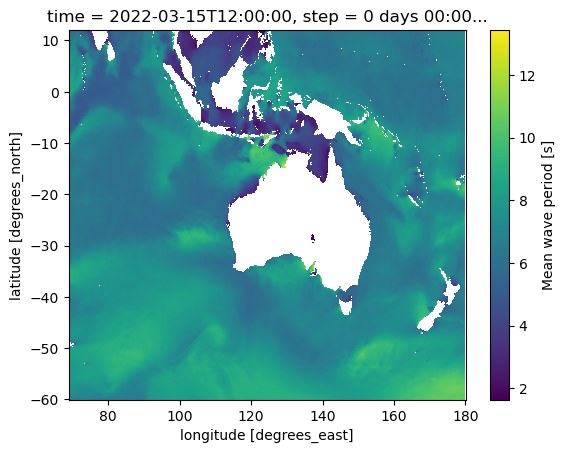

In [6]:
s['mwp'].plot()

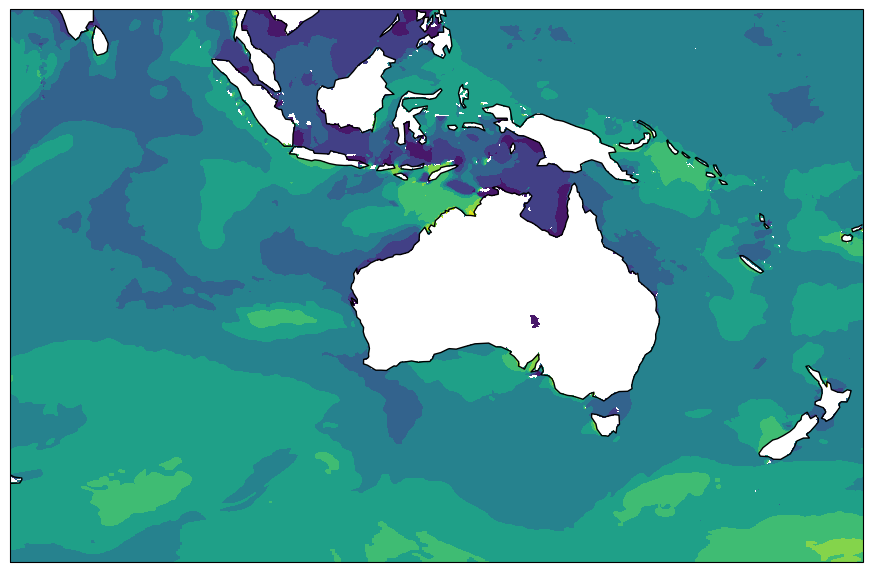

In [8]:
# https://kpegion.github.io/Pangeo-at-AOES/examples/cartopy-tutorial.html

proj = ccrs.PlateCarree()

# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Make a filled contour plot
cs = ax.contourf(s['longitude'], s['latitude'], s['mwp'], transform = proj)

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
# ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# # Define the yticks for latitude
# ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)